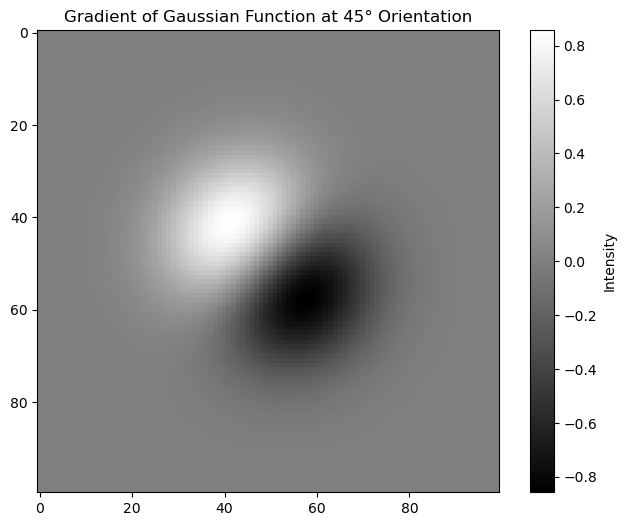

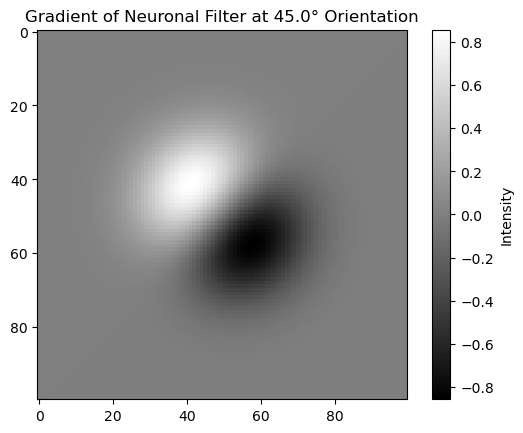

1.0000000000000002
spike count in time bin: 30


In [677]:
import numpy as np
import matplotlib.pyplot as plt

def steerable_filter(input_angle):
    dims = [-3,3,100]
    x = np.linspace(dims[0], dims[1], dims[2])
    y = np.linspace(dims[0], dims[1], dims[2])
    X, Y = np.meshgrid(x, y)
    Gi = np.exp(-(X**2 + Y**2))
    GiPrimex = -2 * X * Gi
    GiPrimey = -2 * Y * Gi
    
   
     
    output = np.cos(input_angle)*GiPrimex + np.sin(input_angle)*GiPrimey
    
    return output 
math_angle = 45
perp_math_angle = math_angle + 90 
perceived_angle = -math_angle + 90
prefered_angle = np.deg2rad(45)
theta = np.deg2rad(math_angle)
GiPrimeTheta = steerable_filter(theta)
neuronFilter = steerable_filter(prefered_angle)
plt.figure(figsize=(8, 6))
# Get the maximum absolute value for symmetric color scaling
vmax = np.max(np.abs(GiPrimeTheta))
plt.imshow(GiPrimeTheta, cmap='grey', vmin=-vmax, vmax=vmax)
plt.title(f'Gradient of Gaussian Function at {math_angle}° Orientation')
plt.colorbar(label='Intensity')
plt.show()

plt.imshow(neuronFilter, cmap='grey', vmin=-vmax, vmax=vmax)
plt.title(f'Gradient of Neuronal Filter at {np.rad2deg(prefered_angle)}° Orientation')
plt.colorbar(label='Intensity')
plt.show()


def matrix_dot_normal(matrix1, matrix2):
    """
    Calculate similarity between two matrices as a proportion (0-1).
    
    Parameters:
    matrix1, matrix2: numpy arrays of the same shape
    
    Returns:
    float: Similarity proportion (0-1) where 1 means identical
    """
    # Flatten matrices
    flat1 = matrix1.flatten()
    flat2 = matrix2.flatten()
    
    # Calculate cosine similarity
    dot_product = np.dot(flat1, flat2)
    # Calculate norms
    norm1 = np.linalg.norm(flat1)
    norm2 = np.linalg.norm(flat2)

    # Avoid division by zero
    if norm1 == 0 or norm2 == 0:
        return 0.0
        
    similarity = dot_product / (norm1 * norm2)
    
    return similarity
matrix_dot_normal(GiPrimeTheta,neuronFilter)

"""
The next step is to convert this dot product to a neural firing rate.
The time frame in which the firing rate is arbitrary so lets just call it 1 second
The maximal firing rate is also a bit arbitrary 
but for physiological realism lets just call it like 20
and we want when the dot product is 1, that lambda = 20
and when the dot product is 0 we don't want much firing so we'll say that lambda has a minimum of 1
to keep things interesting
"""
lam = 19*matrix_dot_normal(GiPrimeTheta,neuronFilter)+1
print(matrix_dot_normal(GiPrimeTheta,neuronFilter))
print("spike count in time bin:",np.random.poisson(lam))

In [678]:
def matrix_dot_normal(matrix1, matrix2):
    """
    Calculate similarity between two matrices as a proportion (0-1).
    
    Parameters:
    matrix1, matrix2: numpy arrays of the same shape
    
    Returns:
    float: Similarity proportion (0-1) where 1 means identical
    """
    # Flatten matrices
    flat1 = matrix1.flatten()
    flat2 = matrix2.flatten()
    
    # Calculate cosine similarity
    dot_product = np.dot(flat1, flat2)
    # Calculate norms
    norm1 = np.linalg.norm(flat1)
    norm2 = np.linalg.norm(flat2)

    # Avoid division by zero
    if norm1 == 0 or norm2 == 0:
        return 0.0
        
    similarity = dot_product / (norm1 * norm2)
    
    return similarity
matrix_dot_normal(GiPrimeTheta,neuronFilter)

1.0000000000000002

In [679]:
"""
The next step is to convert this dot product to a neural firing rate.
The time frame in which the firing rate is arbitrary so lets just call it 1 second
The maximal firing rate is also a bit arbitrary 
but for physiological realism lets just call it like 20
and we want when the dot product is 1, that lambda = 20
and when the dot product is 0 we don't want much firing so we'll say that lambda has a minimum of 1
to keep things interesting
"""
lam = 19*matrix_dot_normal(GiPrimeTheta,neuronFilter)+1
print("spike count in time bin:",np.random.poisson(lam))


spike count in time bin: 20


In [680]:
""" 
Now we want a 3x3 matrix of steerable wavelets and 4 neurons per wavelet, which have receptor 
fields for each target orientation (-225, -45, 45, 225)
Additionally we will need the coherence vs the mean variance versions
lets pick the coherence wavelets randomly, and we can pick the percent coherence randomly
for the time being
"""
coherence_orientation = np.random.choice([-45,45],1)
print(coherence_orientation)
#First Need angles of the 9 steerable wavelets
num_coherent = np.random.randint(0, 10)  # Random integer between 0 and 9
print("Number of coherent wavelets:", num_coherent)

# Calculate percentage of coherence
percent_coherence = num_coherent / 9
print("Percent coherence:", percent_coherence)

# Generate all wavelet indices (0 to 8)
all_wavelet_indices = np.arange(9)

# Randomly choose which wavelets are coherent
if num_coherent > 0:
	coherent_wavelet_indices = np.random.choice(all_wavelet_indices, num_coherent, replace=False)
	print("Coherent wavelet indices:", coherent_wavelet_indices)
else:
	coherent_wavelet_indices = np.array([])
	print("No coherent wavelets")

#I don't think that the position matters for how the computation is going to be done
#but it could be implemented in the future


[45]
Number of coherent wavelets: 7
Percent coherence: 0.7777777777777778
Coherent wavelet indices: [8 3 4 7 2 5 0]


In [681]:
""" 
Neuron Filters -225 -45 45 225
"""
preferred_angles = [-225,-45,45,225]

neuron_filters = np.zeros((4,100,100))
angle_counter = 0
for i in range(4):
        neuron_filters[i] = (steerable_filter(np.deg2rad(preferred_angles[angle_counter])))
        angle_counter += 1
print(neuron_filters.shape)


(4, 100, 100)


In [682]:
""" 
Stim filters
"""
random_angles = np.random.normal(0,90,9)
print(random_angles)
stimulus_filters = np.zeros((9,100,100))
angle_counter = 0
for i in range(9):
        current_index = angle_counter
        if current_index in coherent_wavelet_indices:
            angle = coherence_orientation[0]
        else:
            angle = random_angles[current_index]
            
        stimulus_filters[i] = (steerable_filter(np.deg2rad(angle)))
        angle_counter += 1
print(stimulus_filters.shape)


[  49.46907988  133.58188707   25.78519428  -62.96478613 -109.86155387
   72.35070131   22.84730132  -83.00786564   56.07169874]
(9, 100, 100)


In [683]:
bottom_left_coherence = np.zeros((9))
for i in range(9):
    bottom_left_coherence[i] = matrix_dot_normal(neuron_filters[0],stimulus_filters[i])
    if bottom_left_coherence[i] < 0:
        bottom_left_coherence[i] = 0

print(bottom_left_coherence)
lamBL = 19*bottom_left_coherence+1
BLNeuralPopFiringVector = np.zeros((9))
for i in range(9):
    BLNeuralPopFiringVector[i] = np.random.poisson(lamBL[i])
    
print(BLNeuralPopFiringVector)
top_left_coherence = np.zeros((9))
for i in range(9):
    top_left_coherence[i] = matrix_dot_normal(neuron_filters[1],stimulus_filters[i])
    if top_left_coherence[i] < 0:
        top_left_coherence[i] = 0
print(top_left_coherence)
lamTL = 19*top_left_coherence+1
TLNeuralPopFiringVector = np.random.poisson(lamTL)
print(TLNeuralPopFiringVector)

top_right_coherence = np.zeros((9))
for i in range(9):
    top_right_coherence[i] = matrix_dot_normal(neuron_filters[2],stimulus_filters[i])
    if top_right_coherence[i] < 0:
        top_right_coherence[i] = 0
print(top_right_coherence)
lamTR = 19*top_right_coherence+1
TRNeuralPopFiringVector = np.random.poisson(lamTR)
print(TRNeuralPopFiringVector)

bottom_right_coherence = np.zeros((9))
for i in range(9):
    bottom_right_coherence[i] = matrix_dot_normal(neuron_filters[3],stimulus_filters[i])
    if bottom_right_coherence[i] < 0:
        bottom_right_coherence[i] = 0
print(bottom_right_coherence)
lamBR = 19*bottom_right_coherence+1
BRNeuralPopFiringVector = np.random.poisson(lamBR)
print(BRNeuralPopFiringVector)


[0.         0.99969372 0.         0.         0.         0.
 0.         0.         0.        ]
[ 0. 18.  1.  1.  1.  1.  2.  1.  1.]
[0.         0.         0.         0.         0.         0.
 0.37707629 0.         0.        ]
[1 1 0 1 3 0 6 2 1]
[1.         0.02474821 1.         1.         1.         1.
 0.9261822  1.         1.        ]
[20  3 25 14 15 27 14 27  9]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[2 1 1 0 0 2 1 2 1]
